In [2]:
import os

import act
import matplotlib.pyplot as plt

# First import the NetCDF4 package
from netCDF4 import Dataset
from netCDF4 import MFDataset

# Next import plotting functions
from pylab import *

from datetime import date, datetime

In [4]:
# Place your username and token here
my_arm_username = 'LourencoCavalcante' 
api_access_token = '311d84bc76093a97' #https://adc.arm.gov/armlive/register


In [ ]:
#Site: Manacapuru, Amazonas, Brazil; Mobile Facility (GOAMAZON) (MAO)
# GO - AMAZON (Start: 2014-01-08 for End: 2015-12-01)
datastream = 'maomwrret1liljclouM1.c2'
date_start = '2014-06-01' 
date_end = '2014-06-01'

# Download MWR data on ARM
act.discovery.download_data(my_arm_username, api_access_token, datastream, date_start, date_end)

#Create directores for output plot figures
dir = (f'./{datastream}/output/figures')  
os.makedirs(dir)
#os.mkdir(dir)

c:\ProgramData\Miniconda3\envs\act_env\Lib\site-packages\act\utils\data_utils.py:199: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(diff).mode[0]
c:\ProgramData\Miniconda3\envs\act_env\Lib\site-packages\act\utils\data_utils.py:199: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or

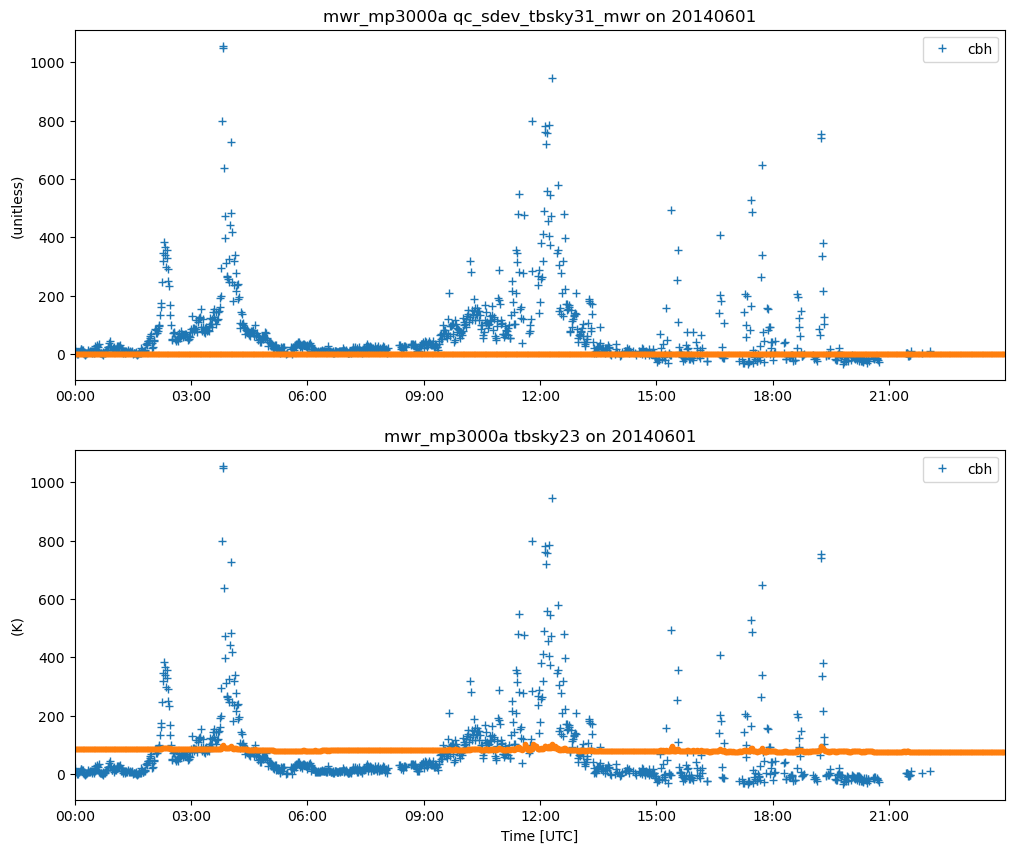

In [46]:
data = datetime.today()
hoje = data.strftime('%d-%m-%Y')
hora = data.strftime('%H-%M-%S')

#Access directores files downloaded

mwr_mp3000a_ds = act.io.armfiles.read_netcdf(f'{datastream}/{datastream}.*.cdf')
ceil_ds = act.io.armfiles.read_netcdf(f'{datastream}/{datastream}.*.cdf')

#print(mwr_mp3000a_ds.variables)
# Create a TimeSeriesDisplay object
mwr_mp3000a_ds = mwr_mp3000a_ds.resample(time='1min').nearest()
ceil_ds = ceil_ds.resample(time='1min').nearest()

display = act.plotting.TimeSeriesDisplay(
   {'mwr_mp3000a': mwr_mp3000a_ds, 'mwr_mp3000a_': ceil_ds},
   subplot_shape=(2,), figsize=(12,10)
)

# Plot data
display.plot('be_lwp', dsname='mwr_mp3000a_', marker='+', markeredgewidth=1,
   linewidth=0, subplot_index=(0,), label='cbh')
display.plot('qc_sdev_tbsky31_mwr', dsname='mwr_mp3000a', cmap='act_HomeyerRainbow', set_shading='nearest',
   add_nan=True, subplot_index=(0,))

display.plot('be_lwp', dsname='mwr_mp3000a_', marker='+', markeredgewidth=1,
   linewidth=0, subplot_index=(1,), label='cbh')
display.plot('tbsky23', dsname='mwr_mp3000a', cmap='act_HomeyerRainbow', set_shading='nearest',
   add_nan=True, subplot_index=(1,))
plt.savefig(f'{datastream}/output/figures/{datastream}_{hoje}_{hora}.png')



In [35]:
print(mwr_mp3000a_ds.variables.keys())

KeysView(Frozen({'time': <xarray.IndexVariable 'time' (time: 1440)>
array(['2014-06-01T00:00:00.000000000', '2014-06-01T00:01:00.000000000',
       '2014-06-01T00:02:00.000000000', ..., '2014-06-01T23:57:00.000000000',
       '2014-06-01T23:58:00.000000000', '2014-06-01T23:59:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    long_name:  Time offset from midnight, 'base_time': <xarray.Variable ()>
array('2014-06-01T00:00:00.000000000', dtype='datetime64[ns]')
Attributes:
    string:     1-Jun-2014, 00:00:00 GMT
    long_name:  Base time in Epoch, 'time_offset': <xarray.Variable (time: 1440)>
array(['2014-06-01T00:00:07.000000000', '2014-06-01T00:01:00.000000000',
       '2014-06-01T00:02:00.000000000', ...,
       '2014-06-01T23:57:11.000000000', '2014-06-01T23:58:03.000000000',
       '2014-06-01T23:58:54.000000000'], dtype='datetime64[ns]')
Attributes:
    long_name:  Time offset from base_time, 'qc_time': <xarray.Variable (time: 1440)>
dask.array<getitem, shape=(1440,), d

REFERENCES:

@misc{zhang, title={MWR Retrievals (MWRRET1LILJCLOU)}, DOI={10.5439/1027369}, journal={Atmospheric Radiation Measurement (ARM) user facility}, author={Zhang, Damao} }